###### Credit : superdatascience.com

Business case : which of your existing customers will buy your brand new car?

## Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Preprocessing

##### Set Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 1/ Logistic Regression

##### Model

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

##### Single Prediction

In [6]:
print(lr.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [7]:
lr_pred = lr.predict(X_test)

##### Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, lr_pred)
print(cm)
accuracy_score(y_test, lr_pred)

[[65  3]
 [ 8 24]]


0.89

##### Cross Val Score

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 82.33 %
Standard Deviation : 9.67 %


##### Visualisation

C:\Users\Dahee\AppData\Local\Temp\ipykernel_19328\2673089281.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


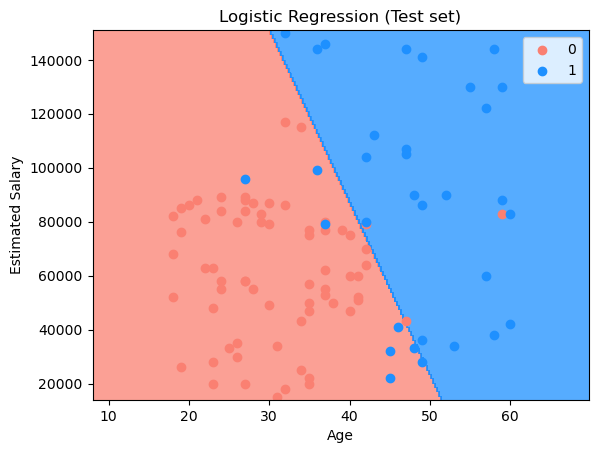

In [47]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, lr.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

import warnings
warnings.filterwarnings('ignore')

89% Accuracy, 82.33% with k-fold Cross Validation

## 2/ K Nearest Neighbors

##### Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Single Prediction

In [11]:
print(knn.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [12]:
knn_pred = knn.predict(X_test)

##### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, knn_pred)
print(cm)
accuracy_score(y_test, knn_pred)

[[64  4]
 [ 3 29]]


0.93

##### Cross Val Score

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 90.67 %
Standard Deviation : 6.63 %


93% Accuracy, 90.67% with k-fold Cross Validation

## 3/ Support Vector Machine

##### Model

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

##### Single Prediction

In [16]:
print(svm.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [17]:
svm_pred = svm.predict(X_test)

##### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svm_pred)
print(cm)
accuracy_score(y_test, svm_pred)

[[66  2]
 [ 8 24]]


0.9

##### Cross Val Score

In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 81.33 %
Standard Deviation : 8.84 %


##### Visualisation

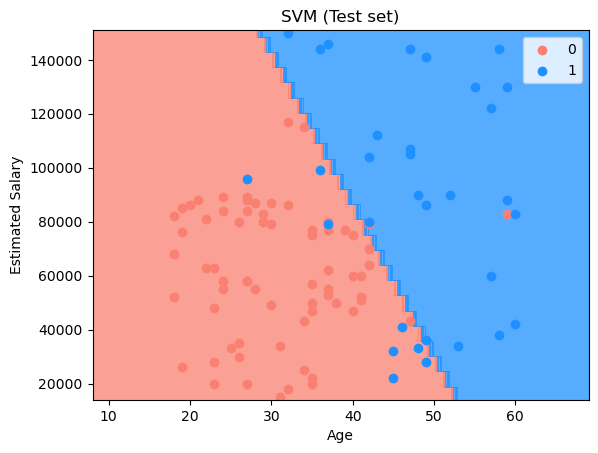

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
    
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

90% Accuracy, 81.33% with k-fold Cross Validation

## 4/ Kernel SVM

##### Model

In [20]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm.fit(X_train, y_train)

SVC(random_state=0)

##### Single Prediction

In [21]:
print(ksvm.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [22]:
ksvm_pred = ksvm.predict(X_test)

##### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ksvm_pred)
print(cm)
accuracy_score(y_test, ksvm_pred)

[[64  4]
 [ 3 29]]


0.93

##### Cross Val Score

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ksvm, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 90.33 %
Standard Deviation : 6.57 %


##### Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.25, 0.5, 0.75, 1], 'kernel':['linear']},
             {'C':[0.25, 0.5, 0.75, 1], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [26]:
grid_search = GridSearchCV(estimator = ksvm, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [27]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [28]:
best_accuracy = grid_search.best_score_
best_param = grid_search.best_params_

print('Best Accuracy : {:.2f} %'.format(best_accuracy * 100))
print('Best Parameter : ', best_param)

Best Accuracy : 90.67 %
Best Parameter :  {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


##### Visualisation

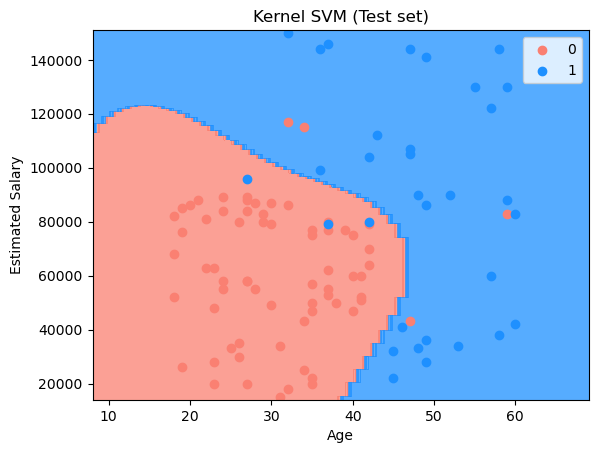

In [45]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, ksvm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
    
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

93% Accuracy, 90.33% with k-fold Cross Validation

## 5/ Decision Tree Classification

##### Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##### Single Prediction

In [30]:
print(dtc.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [33]:
dtc_pred = dtc.predict(X_test)

##### Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, dtc_pred)
print(cm)
accuracy_score(y_test, dtc_pred)

[[62  6]
 [ 3 29]]


0.91

##### Cross Val Score

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 85.00 %
Standard Deviation : 6.37 %


##### Visualisation

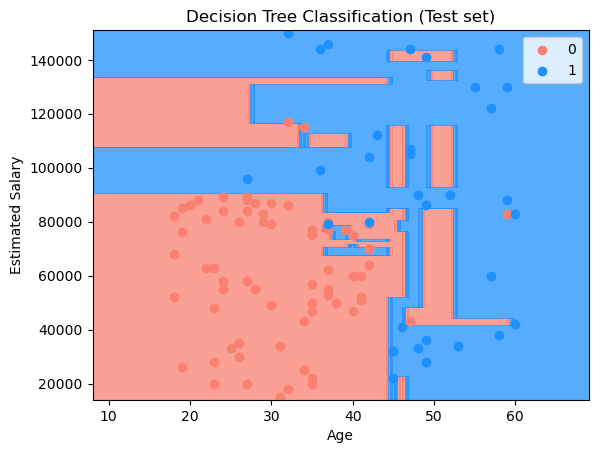

In [51]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, dtc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
    
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

91% Accuracy, 85% with k-fold Cross Validation

## 6/ Random Forest Classification

##### Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

##### Single Prediction

In [37]:
print(rfc.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [38]:
rfc_pred = rfc.predict(X_test)

##### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, rfc_pred)
print(cm)
accuracy_score(y_test, rfc_pred)

[[63  5]
 [ 4 28]]


0.91

##### Cross Val Score

In [40]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 88.33 %
Standard Deviation : 5.82 %


##### Visualisation

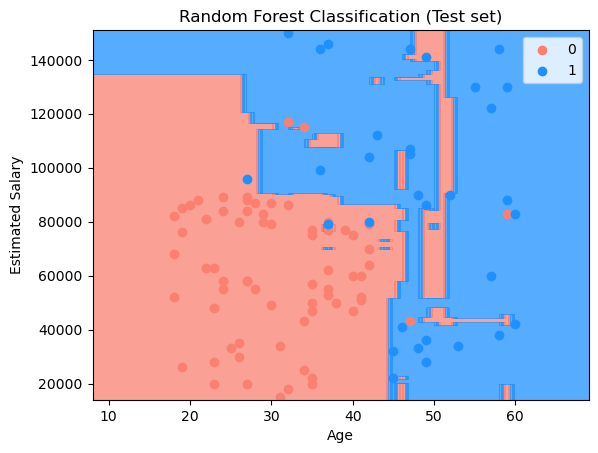

In [57]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, rfc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
    
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

91% Accuracy, 88.33% with k-fold Cross Validation

## 7/ Naive Bayes

##### Model

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

##### Single Prediction

In [42]:
print(nb.predict(sc.transform([[30, 87000]])))

[0]


##### Prediction

In [43]:
nb_pred = nb.predict(X_test)

##### Evluation

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, nb_pred)
print(cm)
accuracy_score(y_test, nb_pred)

[[65  3]
 [ 7 25]]


0.9

##### Cross Val Score

In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print('Accuracy : {:.2f} %'.format(accuracies.mean() * 100))
print('Standard Deviation : {:.2f} %'.format(accuracies.std() * 100))

Accuracy : 87.67 %
Standard Deviation : 8.95 %


##### Visualisation

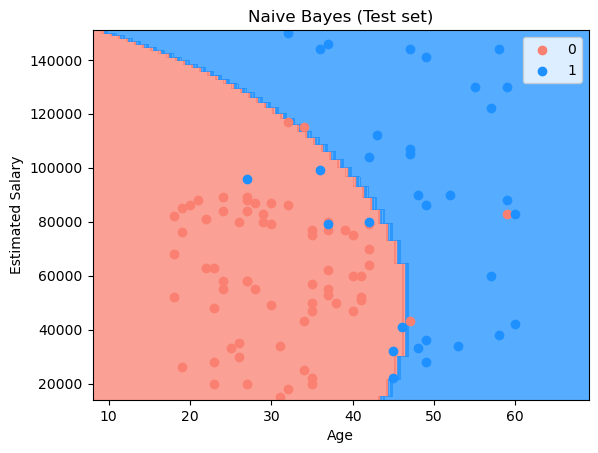

In [48]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, nb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)) :
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
    
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

90% Accuracy, 87.67% with k-fold Cross Validation